<a href="https://colab.research.google.com/github/roshangeoroy/CommunicationSimulations/blob/main/Baseband_Pulse_Transmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pulse Shaping and Matched Filtering
1. Generate a string of message bits.
2. Use root rasied cosine pulse p(t) as the shaping pulse, and generate the
corresponding baseband signal with a fixed bit duration Tb. You may use
roll-off factor as α = 0.4.
3. Simulate transmission of baseband signal via an AWGN channel
4. Apply matched filter with frequency response Pr(f ) = P ∗(f ) to the
received signal.
5. Sample the signal at mTb and compare it against the message sequence.

In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#bitGeneration returns binary PAM output
def bitG(a):
  b=np.random.randint(low=0,high=2,size=a)
  b[b==0]=-1
  return b


array([ 1, -1, -1, -1, -1,  1,  1, -1, -1,  1])

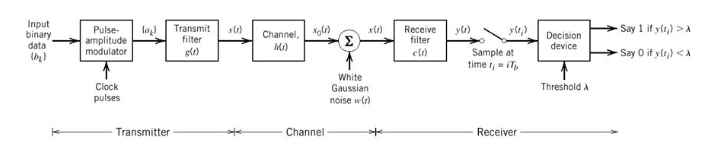

As shown in the block diagram above, the output from PAM ak is returned by the function bitG. This is inturn passed through a Transmit Filter g(t) and then through a Channel with impulse response h(t). To this, White Gaussian Noise is added w(t) which is recieved by recieve filter of impulse response c(t).
h(t) is considered as flat.

Here as specified the pulse shaping used in the transmit filter is that of a root raised cosine. This is matched with the recieve filter as well, i.e c(t) will be kg(t-T) or, C(f) will be complex conjugate of G(f). 

Expression for g(t) is as coded below

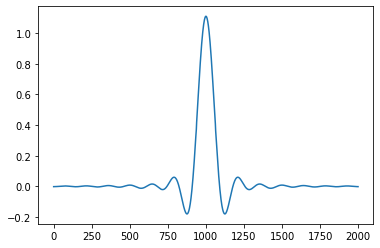

In [122]:
t=np.arange(-10,10,0.01)
r=0.4 #roll off factor
T=1 #bit duration

pi=3.14
p=(1/math.sqrt(T))*((np.sin(pi*t*(1-r))+(4*r*t/T)*np.cos(pi*t*(1+r)/T))/((pi*t/T)*(1-(4*r*t/T)**2)));
p[t==0]=(1/math.sqrt(T))*((1-r)*(4*r/pi))
p[t==T/(4*r) ]=(r/math.sqrt(2*T))*((1+2/pi)*np.sin(pi/(4*r))+(1-(2/pi))*np.cos(pi/(4*r)))
p[t==-1*T/(4*r)]=(r/math.sqrt(2*T))*((1+2/pi)*np.sin(pi/(4*r))+(1-(2/pi))*np.cos(pi/(4*r)))

plt.plot(p);



[ 1  1 -1  1 -1 -1  1 -1 -1 -1]


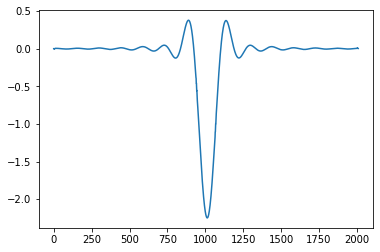

In [123]:
#transmitter
s=bitG(10)
print(s)
X=np.convolve(s,p)
plt.plot(X)



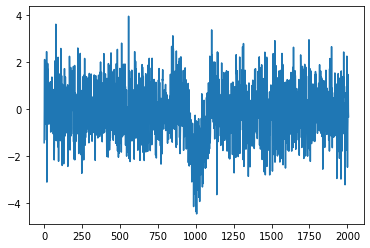

In [124]:
#adding AWGN
n=np.random.normal(0,1,X.size)
X=X+n
plt.plot(X)


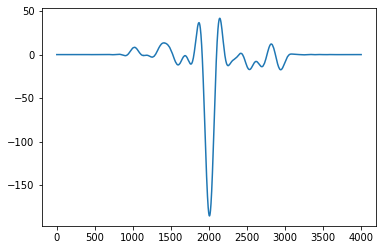

In [127]:

Final=np.convolve(X,p)
plt.plot(Final)

